In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [34]:
# Create a sigmoid function for use throughout this assignment
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def generate_data(m):
    """Returns the true w as well as X, Y data"""
    # Generate a random weight vector w of length 10
    w = np.random.uniform(low=-1_000_000, high=1_000_000, size=10)
    # Normalize the weight vector
    w /= np.linalg.norm(w)

    # Initialize arrays to store training data
    X = np.random.randn(m, 10)  # Generate m random vectors in R^10 from N(0, I)
    
    # Calculate the probabilities P[y=+1] for each x_i
    probabilities = sigmoid(np.dot(X, w))

    # Generate y_i: 0 or +1 based on the probabilities
    y = np.random.binomial(n=1, p=probabilities, size=m)

    return w, X, y

## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [35]:
from sklearn.linear_model import LogisticRegression

def log_reg(X_train, y_train): 
    m = X_train.shape[0]

    # Create a LogisticRegression model
    clf = LogisticRegression(max_iter=1000)

    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Get the learned weight vector w
    log_learned_w = clf.coef_[0]
    return log_learned_w

## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [36]:
def grad_desc(X_train, y_train):
    m, n = X_train.shape  # m: number of samples, n: number of features

    # Hyperparameters
    eta = 0.01
    max_iterations = 1000

    # Initialize the weight vector randomly
    w = np.zeros(n)

    # Gradient Descent
    for iteration in range(max_iterations):
        # Calculate the predicted values for the current weight vector
        predictions = sigmoid(np.dot(X_train, w))
        
        # Calculate the gradient of the loss with respect to the weight vector
        gradient = np.dot(X_train.T, (predictions - y_train) * predictions * (1 - predictions)) / m
        
        # Update the weight vector
        w -= eta * gradient
    
    grad_learned_w = w
    return grad_learned_w

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [37]:
def stoch_grad_desc(X_train, y_train):
    m, n = X_train.shape  # m: number of samples, n: number of features

    # Hyperparameters
    eta = 0.01
    max_iterations = 1000

    # Initialize the weight vector
    w = np.zeros(n)

    # Stochastic Gradient Descent
    for iteration in range(max_iterations):
        # Randomly select a training point
        random_index = np.random.randint(0, m)
        x_i = X_train[random_index]
        y_i = y_train[random_index]
        
        # Calculate the predicted value for the selected training point
        prediction = sigmoid(np.dot(w, x_i))
        
        # Calculate the gradient of the squared loss with respect to the weight vector
        gradient = (prediction - y_i) * prediction * (1 - prediction) * x_i
        
        # Update the weight vector
        w -= eta * gradient

    stoch_learned_w = w
    return stoch_learned_w

## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w - 
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
   for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

In [38]:
import time
m = np.arange(start=50,stop=251,step=50)

for m_val in m:
    # Initialize norm difference lists
    logreg_DiffList = []
    graddesc_DiffList = []
    stoch_DiffList = []

    # Initialize time difference lists
    logreg_TimeList = []
    graddesc_TimeList = []
    stoch_TimeList = []

    for i in range(100):
        # Generate data for this iteration
        true_w, X_train, y_train = generate_data(m_val)

        # For LogReg...
        begin = time.time()
        logreg_w = log_reg(X_train,y_train)
        end = time.time()
        logreg_DiffList.append(np.linalg.norm(true_w - logreg_w))
        logreg_TimeList.append(end - begin)

        # For GradDesc...
        begin = time.time()
        graddesc_w = grad_desc(X_train,y_train)
        end = time.time()
        graddesc_DiffList.append(np.linalg.norm(true_w - graddesc_w))
        graddesc_TimeList.append(end - begin)

        # For StochGradDesc...
        begin = time.time()
        stoch_w = stoch_grad_desc(X_train,y_train)
        end = time.time()
        stoch_DiffList.append(np.linalg.norm(true_w - stoch_w))
        stoch_TimeList.append(end - begin)

    print(f'For m={m_val}:\n'
          f'LogReg avg error = {np.mean(logreg_DiffList)}\n'
          f'LogReg avg time = {np.mean(logreg_TimeList)}\n'
          f'GradDesc avg error = {np.mean(graddesc_DiffList)}\n'
          f'GradDesc avg time = {np.mean(graddesc_TimeList)}\n'
          f'StochGradDesc avg error = {np.mean(stoch_DiffList)}\n'
          f'StochGradDesc avg time = {np.mean(stoch_TimeList)}')
    print('\n')

For m=50:
LogReg avg error = 1.116799569651832
LogReg avg time = 0.0028810811042785643
GradDesc avg error = 0.727122938455302
GradDesc avg time = 0.019348065853118896
StochGradDesc avg error = 0.7268564872367402
StochGradDesc avg time = 0.013257505893707276


For m=100:
LogReg avg error = 0.761176470271261
LogReg avg time = 0.002430260181427002
GradDesc avg error = 0.6868544835630985
GradDesc avg time = 0.019470412731170655
StochGradDesc avg error = 0.6927823465416373
StochGradDesc avg time = 0.011670684814453125


For m=150:
LogReg avg error = 0.6020847388432885
LogReg avg time = 0.0024577903747558592
GradDesc avg error = 0.6799595564704323
GradDesc avg time = 0.02261315107345581
StochGradDesc avg error = 0.6879657849004388
StochGradDesc avg time = 0.011231172084808349


For m=200:
LogReg avg error = 0.5180222871819435
LogReg avg time = 0.0025316572189331057
GradDesc avg error = 0.652099297373958
GradDesc avg time = 0.022980201244354247
StochGradDesc avg error = 0.6574741193830398
Sto

# Problem 2

In [39]:
from sklearn import datasets

In [40]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

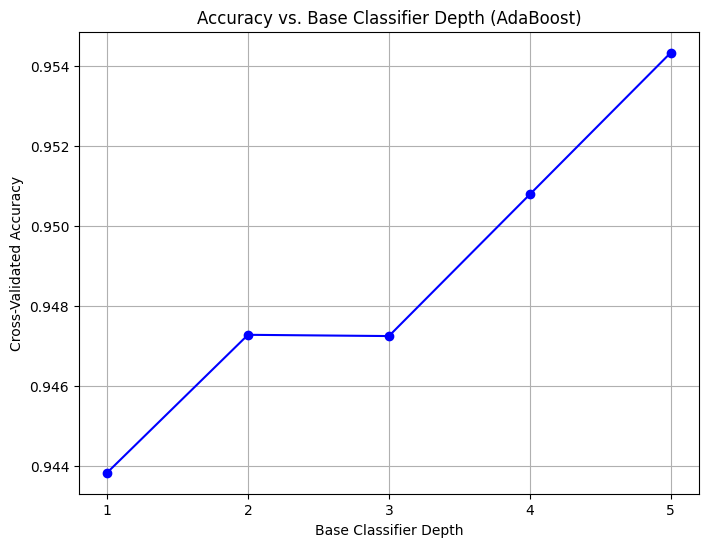

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# Define a range of depths to test
depths = range(1,6)

# Initialize lists to store cross-validated accuracy for each depth
cv_accuracies = []

# Common random state for both base learner and AdaBoost
random_state = 101

# Iterate over depths and perform cross-validation
for depth in depths:
    # Create a Decision Tree Classifier with the specified depth
    base_classifier = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    
    # Create an AdaBoost Classifier with the base classifier
    ada_classifier = AdaBoostClassifier(base_classifier, n_estimators=10, learning_rate=1, random_state=random_state)
    
    # Perform 10-fold cross-validation and calculate the mean accuracy
    scores = cross_val_score(ada_classifier, cancer.data, cancer.target, cv=KFold(n_splits=10,random_state=random_state,shuffle=True))
    cv_accuracy = np.mean(scores)
    
    # Append the cross-validated accuracy to the list
    cv_accuracies.append(cv_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(depths, cv_accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Base Classifier Depth (AdaBoost)')
plt.xlabel('Base Classifier Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.xticks(depths)
plt.show()
